# Chapter 9: Two Landmark Quantum Algorithms

Bernstein-Vazirani and Grover's algorithms.

---

**Note:** This notebook corresponds to Chapter 7 of the textbook.

**Prerequisites:**
- Python 3.8+
- Qiskit 2.1.2
- See `Chapter02_QuantumSoftware.ipynb` for installation instructions


In [1]:
# Setup and imports
import numpy as np
import math
from qiskit import QuantumCircuit
from IPython.display import display
from qiskit.circuit.library.standard_gates.u import UGate
from qiskit.circuit.library import grover_operator
from Chapter03_EngineeringOptimization_functions import (truss2x2,truss3x2,truss2x3,truss3x3,truss_10bar)
from Chapter08_QuantumGates_functions import simulateCircuit, analyzeCircuitForSimulator, analyzeCircuitForHardware
from Chapter10_LandmarkAlgorithms_functions import (bv_secret_circuit, grover_secret_circuit,
                TrussFeasibilityGrover)


## Bernstein Vazarani Algorithm

### Berstein Vazarani Circuit 

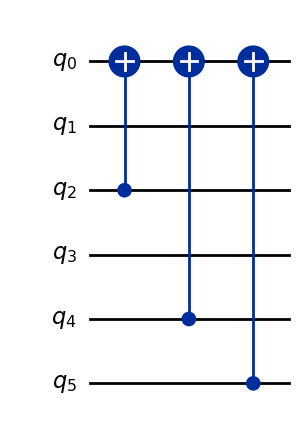

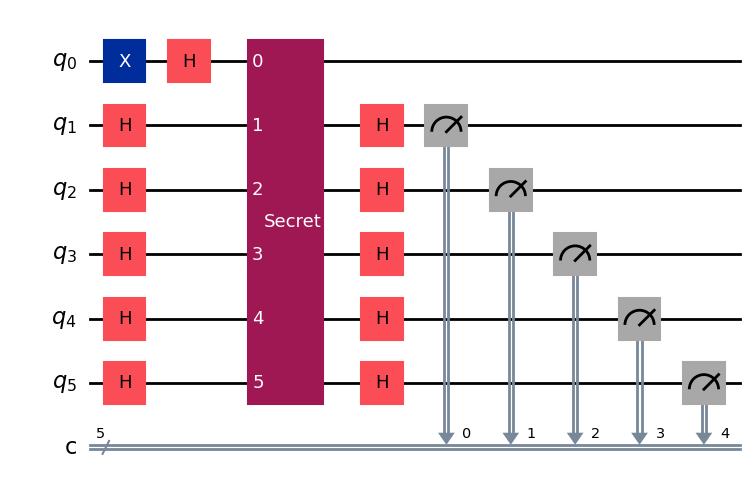

{'11010': 1}
The total depth is  5
The total width is  11


In [2]:
U, n = bv_secret_circuit()
circuit = QuantumCircuit(n+1,n)
circuit.x(0) 
circuit.h(0) # This brings qubit 0 to |-> state
circuit.h(range(1,n+1)) 
circuit.unitary(U,range(n+1),'Secret')
circuit.h(range(1,n+1))
circuit.measure(range(1,n+1), range(0,n)) 
display(circuit.draw('mpl')) 
counts = simulateCircuit(circuit,shots = 1)
print(counts)
print("The total depth is ", circuit.depth())
print("The total width is ", circuit.width())

## Grover algorithm

In [3]:

oracle = grover_secret_circuit()
grover_op = grover_operator(oracle)
nQubits = grover_op.num_qubits
N = 2**nQubits
K = math.floor(math.pi / (4 * math.asin(math.sqrt(1 / N))))
print("Optimal number of Grover iterations:", K)
qc = QuantumCircuit(grover_op.num_qubits)

qc.h(range(grover_op.num_qubits)) # Create  superposition of all basis states
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(K), inplace=True)
qc.measure_all()

counts = simulateCircuit(qc,shots = 1024)
print(counts)

Optimal number of Grover iterations: 4
{'01000': 1, '11010': 1022, '10101': 1}


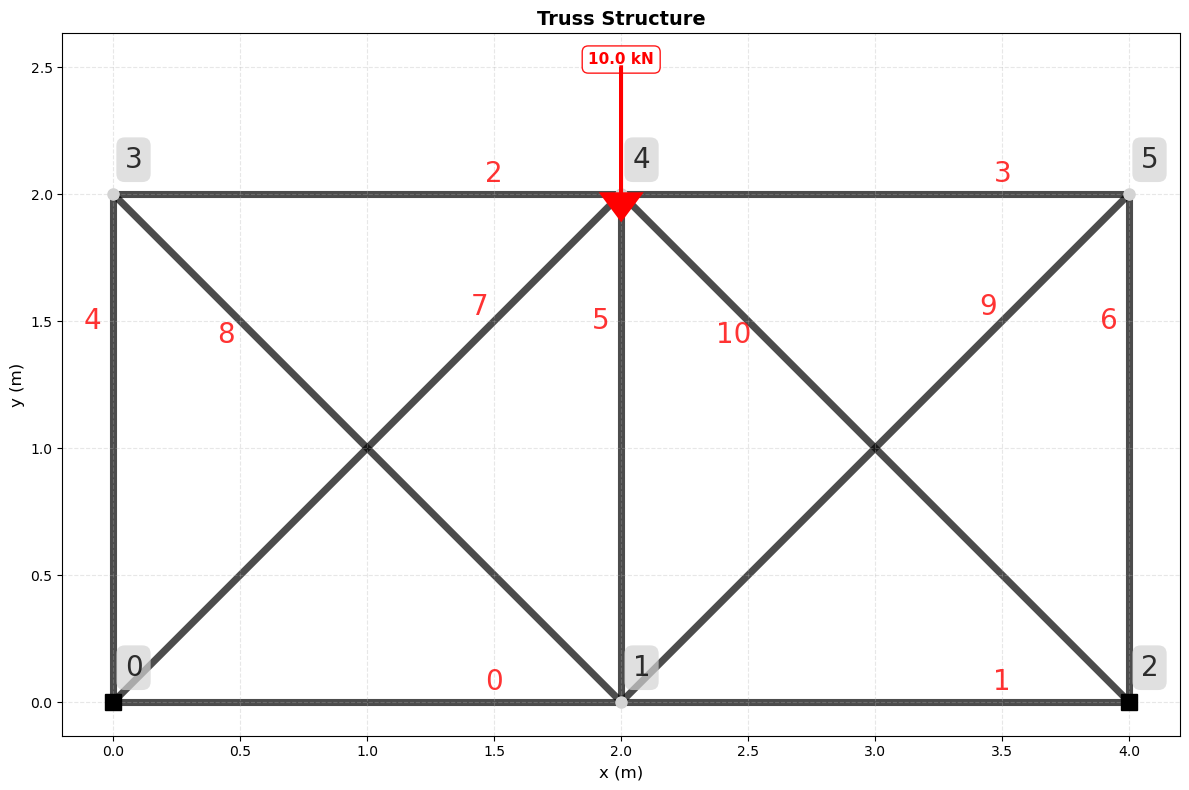

In [4]:
truss = truss3x2()
truss.plot_truss()



## Create instance of the feasibility class

In [5]:
areaSave = truss.A.copy()
E = truss.elements.copy()
constraint_nodes = [0,2,4] 
groverTruss = TrussFeasibilityGrover(E,constraint_nodes)



Truss Configuration:
  Elements: 11
  Constraint nodes: [0, 2, 4]
  Total qubits: 15


## Create the Grover circuit and analyze for simulation

In [6]:
groverTrussCircuit = groverTruss.create_grover_circuit(decompose_mcx=False)

analyzeCircuitForSimulator(groverTrussCircuit,method = 'statevector')

--- Simulator Analysis (statevector) ---
Number of qubits: 15
Original Gate Count: 336
Transpiled Gate Count: 121
Circuit Depth: 32
Multi-Qubit (CX/ECR) Gates: 0


## Run Simulation Circuit

In [7]:
# Run the search
counts = simulateCircuit(groverTrussCircuit, shots=1024)
groverTruss.print_analysis(counts)
feasibleString = groverTruss.get_feasible_strings(counts)[0][0]
# Note that truss 0 corresponds to the least significant bit
# Example: '00000100011' corresponds to elements 0,1,5 being active
print("Feasible design (binary string):", feasibleString)


Grover Search Results
Total measurements: 1024
Unique designs: 814
Feasible designs: 764/1024 (74.6%)
----------------------------------------------------------------------
Feasible design (binary string): 00110011110


## Create sub-structure

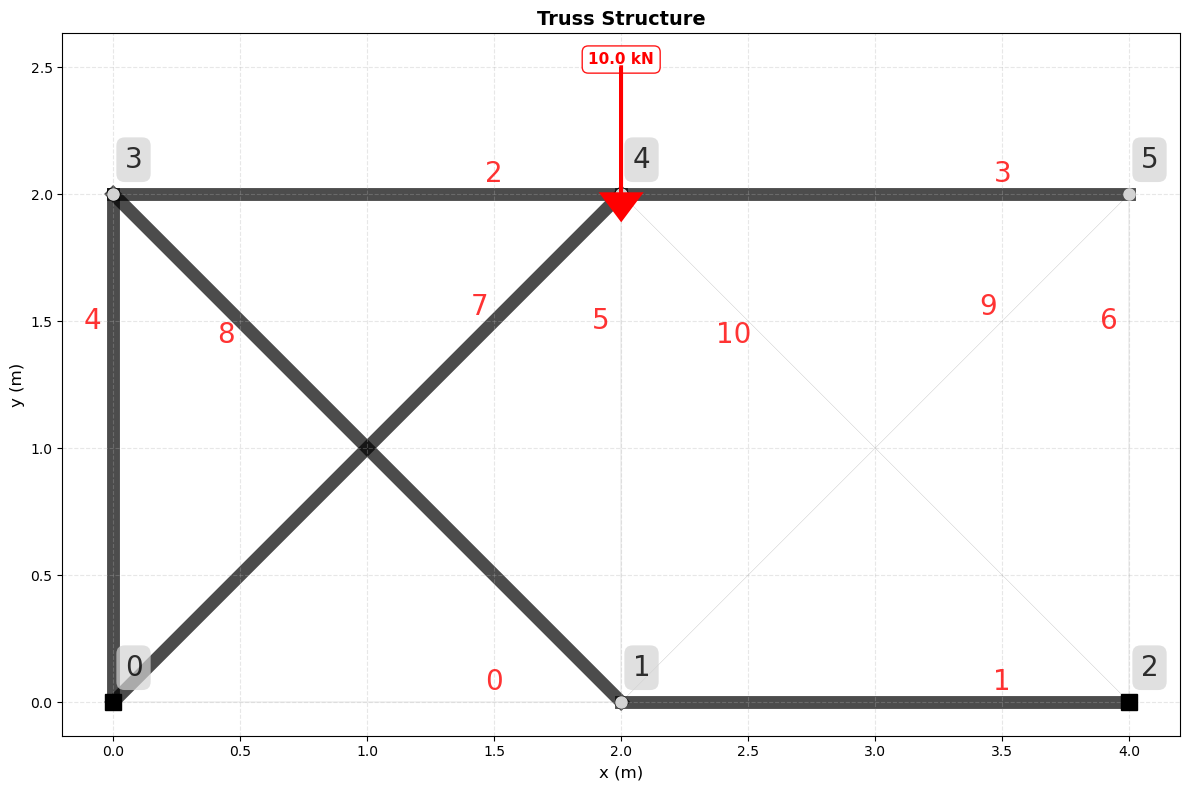

In [10]:
# reverse the order
sub_structure = np.array(list(feasibleString)).astype(int)[::-1]  
areaSave = truss.A.copy()
area = areaSave * sub_structure  # Zero area for inactive members
truss.set_area(area)
truss.plot_truss()

## Analyze for hardware

In [9]:

analyzeCircuitForHardware(groverTrussCircuit)

qiskit_runtime_service._resolve_cloud_instances:WARNING:2026-01-15 08:53:51,148: Default instance not set. Searching all available instances.


Using backend: <IBMBackend('ibm_fez')>
--- Hardware Analysis for ibm_fez ---
Number of qubits (on chosen hardware): 156
Original Gate Count: 336
Transpiled Gate Count: 8885
Circuit Depth: 3752
Multi-Qubit (CX/ECR) Gates: 0
